In [140]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 
from warnings import simplefilter

In [141]:
import models
import class_sampling
import train
import metric_utils
import inference

In [142]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 2
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
momentum = 0

ratio = (100, 1)

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

nums = (0, 1)

CLASS_LABELS = {'airplane': 0,
                 'automobile': 1,
                 'bird': 2,
                 'cat': 3,
                 'deer': 4,
                 'dog': 5,
                 'frog': 6,
                 'horse': 7,
                 'ship': 8,
                 'truck': 9}

DIRECTORY = f"results/learning_rate_results_{str(nums[0])}{str(nums[1])}"
RATIO_STR = str(ratio[0])


simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)

In [144]:
train_CIFAR10 = torchvision.datasets.CIFAR10('cifar10', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))  


test_CIFAR10 = torchvision.datasets.CIFAR10('cifar10', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()]))

train_CIFAR10.data = train_CIFAR10.data.reshape(50000, 3, 32, 32)
test_CIFAR10.data = test_CIFAR10.data.reshape(10000, 3, 32, 32)

    
reduced_train_CIFAR10 = class_sampling.Reduce(train_CIFAR10, NUM_CLASSES_REDUCED, nums=nums, CIFAR=True)
reduced_test_CIFAR10 = class_sampling.Reduce(test_CIFAR10, NUM_CLASSES_REDUCED, nums=nums, CIFAR=True)

ratio_train_CIFAR10 = class_sampling.BinaryRatio(train_CIFAR10, NUM_CLASSES_REDUCED, ratio, nums=nums,CIFAR=True)

Files already downloaded and verified
Files already downloaded and verified


In [145]:
train_loader_reduced = DataLoader(reduced_train_CIFAR10, batch_size=batch_size_train, shuffle=True) 

test_loader_reduced = DataLoader(reduced_test_CIFAR10, batch_size=batch_size_test, shuffle=True) 

train_loader_ratio = DataLoader(ratio_train_CIFAR10, batch_size=batch_size_train, shuffle=True)


Test set: Avg. loss: 0.04228215217590332, AUC: 0.4738995


Test set: Avg. loss: 90.92114453125, AUC: 0.7773545


Test set: Avg. loss: 95.03719921875, AUC: 0.7730000000000001


Test set: Avg. loss: 648.34028125, AUC: 0.526


Test set: Avg. loss: 67.099046875, AUC: 0.8135


Test set: Avg. loss: 67.203537109375, AUC: 0.81


Test set: Avg. loss: 81.4743984375, AUC: 0.782948


Test set: Avg. loss: 172.2639765625, AUC: 0.7059999999999998


Test set: Avg. loss: 254.9037265625, AUC: 0.6419999999999999


Test set: Avg. loss: 69.57658203125, AUC: 0.8095


Test set: Avg. loss: 69.157955078125, AUC: 0.8159104999999999


Test set: Avg. loss: 90.5908515625, AUC: 0.7875


Test set: Avg. loss: 86.45448828125, AUC: 0.7755000000000001


Test set: Avg. loss: 320.475046875, AUC: 0.575


Test set: Avg. loss: 152.383953125, AUC: 0.7224999999999999


Test set: Avg. loss: 181.878921875, AUC: 0.6924999999999999


Test set: Avg. loss: 372.632578125, AUC: 0.607


Test set: Avg. loss: 179.3196796875, AUC: 0.6925


Test set: Avg. loss: 518.36571875, AUC: 0.5495


Test set: Avg. loss: 70.85503125, AUC: 0.8039999999999999


Test set: Avg. loss: 313.1796875, AUC: 0.627


Test set: Avg. loss: 364.18575, AUC: 0.5865


Test set: Avg. loss: 439.124375, AUC: 0.5295


Test set: Avg. loss: 205.065734375, AUC: 0.6795


Test set: Avg. loss: 330.27471875, AUC: 0.5545


Test set: Avg. loss: 92.98888671875, AUC: 0.762


Test set: Avg. loss: 118.4065625, AUC: 0.7515000000000001


Test set: Avg. loss: 109.7175234375, AUC: 0.7685


Test set: Avg. loss: 111.9873046875, AUC: 0.7695000000000001


Test set: Avg. loss: 70.3401328125, AUC: 0.8105


Test set: Avg. loss: 299.336203125, AUC: 0.5445


Test set: Avg. loss: 162.882921875, AUC: 0.6685000000000001


Test set: Avg. loss: 646.446625, AUC: 0.5355


Test set: Avg. loss: 107.6508125, AUC: 0.7395


Test set: Avg. loss: 0.03544166946411133, AUC: 0.5501480000000001


Test set: Avg. loss: 107.9501171875, AUC: 0.7669999999999999


Test set: Avg. loss: 189.2320546875, AU

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 239.8249765625, AUC: 0.5885



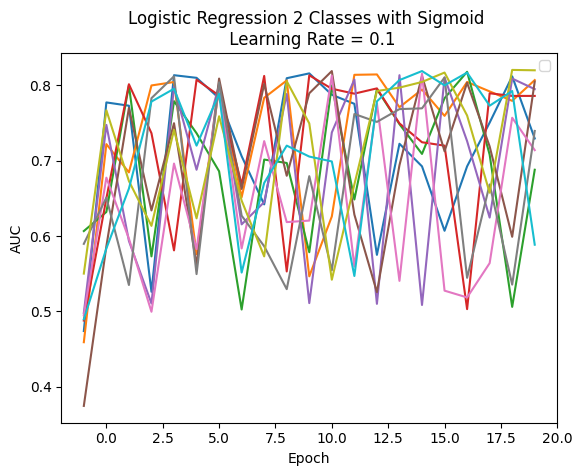


Test set: Avg. loss: 0.04430400848388672, AUC: 0.453669


Test set: Avg. loss: 11.304828125, AUC: 0.741286


Test set: Avg. loss: 34.810484375, AUC: 0.584


Test set: Avg. loss: 8.004340087890625, AUC: 0.798832


Test set: Avg. loss: 52.704857421875, AUC: 0.5485


Test set: Avg. loss: 10.84440869140625, AUC: 0.7570000000000001


Test set: Avg. loss: 10.075845703125, AUC: 0.7615


Test set: Avg. loss: 19.8307158203125, AUC: 0.6844999999999999


Test set: Avg. loss: 18.5836640625, AUC: 0.6404795


Test set: Avg. loss: 7.454090087890625, AUC: 0.8029999999999999


Test set: Avg. loss: 27.4444404296875, AUC: 0.6395


Test set: Avg. loss: 8.9167255859375, AUC: 0.7869465


Test set: Avg. loss: 27.074650390625, AUC: 0.5755


Test set: Avg. loss: 39.552267578125, AUC: 0.5825


Test set: Avg. loss: 28.2399208984375, AUC: 0.5719799999999999


Test set: Avg. loss: 10.8965498046875, AUC: 0.7364664999999999


Test set: Avg. loss: 85.35026171875, AUC: 0.5105


Test set: Avg. loss: 11.20603955078125,


Test set: Avg. loss: 22.7933046875, AUC: 0.6645


Test set: Avg. loss: 18.01411328125, AUC: 0.6419819999999999


Test set: Avg. loss: 6.82373095703125, AUC: 0.8213865


Test set: Avg. loss: 38.327234375, AUC: 0.5950000000000001


Test set: Avg. loss: 0.01253975772857666, AUC: 0.5195325000000001


Test set: Avg. loss: 26.148291015625, AUC: 0.6335


Test set: Avg. loss: 39.4169375, AUC: 0.5844999999999999


Test set: Avg. loss: 8.332984375, AUC: 0.783835


Test set: Avg. loss: 62.040259765625, AUC: 0.5289990000000001


Test set: Avg. loss: 95.2360546875, AUC: 0.506


Test set: Avg. loss: 30.25758984375, AUC: 0.6234939999999999


Test set: Avg. loss: 15.62162744140625, AUC: 0.6784760000000001


Test set: Avg. loss: 12.81649755859375, AUC: 0.7374744999999999


Test set: Avg. loss: 7.669655029296875, AUC: 0.7905


Test set: Avg. loss: 12.75811083984375, AUC: 0.6804715000000001


Test set: Avg. loss: 14.00855859375, AUC: 0.7274815


Test set: Avg. loss: 30.5143583984375, AUC: 0.5495


Test 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 6.79605029296875, AUC: 0.8128759999999999


Test set: Avg. loss: 10.16345361328125, AUC: 0.7685



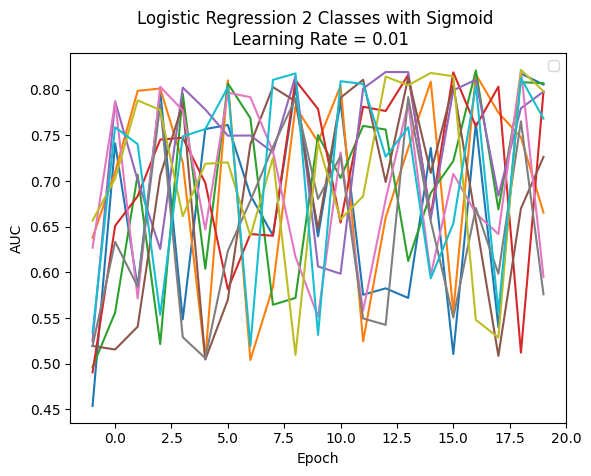


Test set: Avg. loss: 0.03863613510131836, AUC: 0.48799499999999996


Test set: Avg. loss: 1.8468140869140626, AUC: 0.680682


Test set: Avg. loss: 0.7747527465820313, AUC: 0.8000790000000001


Test set: Avg. loss: 5.231829345703125, AUC: 0.5194960000000001


Test set: Avg. loss: 0.7383907165527344, AUC: 0.813823


Test set: Avg. loss: 0.8644363708496093, AUC: 0.793449


Test set: Avg. loss: 0.8050897521972656, AUC: 0.7956000000000001


Test set: Avg. loss: 3.57762841796875, AUC: 0.600485


Test set: Avg. loss: 0.844032470703125, AUC: 0.7944804999999999


Test set: Avg. loss: 6.30169140625, AUC: 0.5384990000000001


Test set: Avg. loss: 5.3528720703125, AUC: 0.5104965


Test set: Avg. loss: 3.148249267578125, AUC: 0.562522


Test set: Avg. loss: 4.359142578125, AUC: 0.5709985


Test set: Avg. loss: 1.2227944946289062, AUC: 0.702148


Test set: Avg. loss: 2.2360562744140626, AUC: 0.6584525


Test set: Avg. loss: 2.4039112548828125, AUC: 0.61193


Test set: Avg. loss: 10.29468701171875, 


Test set: Avg. loss: 0.7176754760742188, AUC: 0.8156295


Test set: Avg. loss: 2.1009769287109377, AUC: 0.625046


Test set: Avg. loss: 3.1386102294921874, AUC: 0.552482


Test set: Avg. loss: 0.8031885681152344, AUC: 0.798068


Test set: Avg. loss: 1.2763070068359375, AUC: 0.7560675


Test set: Avg. loss: 0.6744145202636719, AUC: 0.818374


Test set: Avg. loss: 1.3086448974609375, AUC: 0.7040075


Test set: Avg. loss: 1.0625114440917969, AUC: 0.7785899999999999


Test set: Avg. loss: 1.3531392211914062, AUC: 0.741446


Test set: Avg. loss: 2.3306817626953125, AUC: 0.658641


Test set: Avg. loss: 0.041094715118408204, AUC: 0.6605005


Test set: Avg. loss: 3.66403857421875, AUC: 0.5654925


Test set: Avg. loss: 2.2301705322265626, AUC: 0.6735720000000001


Test set: Avg. loss: 4.986448974609375, AUC: 0.512


Test set: Avg. loss: 4.033151611328125, AUC: 0.524972


Test set: Avg. loss: 1.5860433349609375, AUC: 0.7125925


Test set: Avg. loss: 1.97419677734375, AUC: 0.6496314999999999


T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 2.9771153564453123, AUC: 0.561958



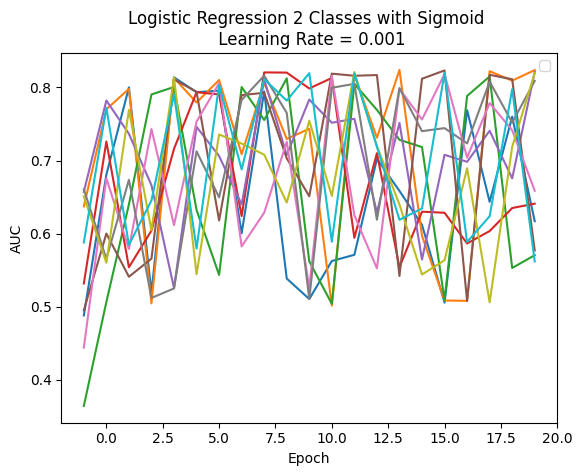


Test set: Avg. loss: 0.0432659854888916, AUC: 0.5208704999999999


Test set: Avg. loss: 0.2732301330566406, AUC: 0.6459475


Test set: Avg. loss: 0.9839172668457031, AUC: 0.501499


Test set: Avg. loss: 0.6665237731933594, AUC: 0.5299895


Test set: Avg. loss: 0.08969253158569336, AUC: 0.777675


Test set: Avg. loss: 0.06991060638427735, AUC: 0.810305


Test set: Avg. loss: 0.12872404098510742, AUC: 0.7560439999999999


Test set: Avg. loss: 0.6551364135742187, AUC: 0.506004


Test set: Avg. loss: 0.2058929672241211, AUC: 0.6895295


Test set: Avg. loss: 0.13159503555297852, AUC: 0.7639315


Test set: Avg. loss: 0.19727675628662109, AUC: 0.64955


Test set: Avg. loss: 0.0937743034362793, AUC: 0.7718239999999998


Test set: Avg. loss: 0.10624977111816407, AUC: 0.7889395000000001


Test set: Avg. loss: 0.2278732681274414, AUC: 0.608082


Test set: Avg. loss: 0.06949080276489258, AUC: 0.8305784999999999


Test set: Avg. loss: 0.15863650512695313, AUC: 0.742949


Test set: Avg. loss: 0.125


Test set: Avg. loss: 0.08897728729248047, AUC: 0.7798540000000002


Test set: Avg. loss: 0.10074482345581055, AUC: 0.7911735000000001


Test set: Avg. loss: 0.0938779067993164, AUC: 0.7806850000000001


Test set: Avg. loss: 0.7029104919433594, AUC: 0.5255095


Test set: Avg. loss: 0.07252030563354492, AUC: 0.8296735


Test set: Avg. loss: 0.10732707977294922, AUC: 0.789273


Test set: Avg. loss: 0.06506467628479004, AUC: 0.831182


Test set: Avg. loss: 0.4015157928466797, AUC: 0.608484


Test set: Avg. loss: 0.07502909469604492, AUC: 0.8227665


Test set: Avg. loss: 1.038987579345703, AUC: 0.5059985


Test set: Avg. loss: 0.2859886474609375, AUC: 0.5642595


Test set: Avg. loss: 0.0707675838470459, AUC: 0.8289120000000001


Test set: Avg. loss: 0.02845002841949463, AUC: 0.4713025


Test set: Avg. loss: 0.750314208984375, AUC: 0.502994


Test set: Avg. loss: 0.3753322448730469, AUC: 0.599782


Test set: Avg. loss: 0.07066455078125, AUC: 0.8158405


Test set: Avg. loss: 0.08295356369018

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.1576790771484375, AUC: 0.6763994999999999



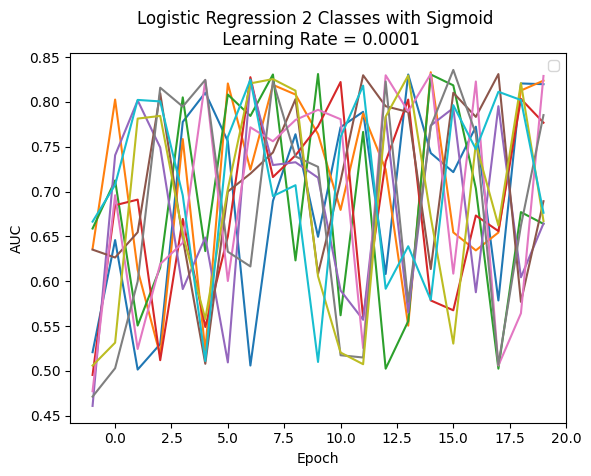


Test set: Avg. loss: 0.009144032955169678, AUC: 0.49468350000000005


Test set: Avg. loss: 0.07658974838256837, AUC: 0.605403


Test set: Avg. loss: 0.07235821914672852, AUC: 0.625826


Test set: Avg. loss: 0.066490478515625, AUC: 0.649703


Test set: Avg. loss: 0.028380091667175294, AUC: 0.6251515


Test set: Avg. loss: 0.018017630577087402, AUC: 0.863107


Test set: Avg. loss: 0.040716293334960935, AUC: 0.7584949999999999


Test set: Avg. loss: 0.06234275245666504, AUC: 0.507501


Test set: Avg. loss: 0.01126311731338501, AUC: 0.889589


Test set: Avg. loss: 0.05754436683654785, AUC: 0.511499


Test set: Avg. loss: 0.021540743827819824, AUC: 0.666539


Test set: Avg. loss: 0.029704972267150877, AUC: 0.8127239999999999


Test set: Avg. loss: 0.007009019136428833, AUC: 0.8610165


Test set: Avg. loss: 0.007115797519683838, AUC: 0.8590329999999999


Test set: Avg. loss: 0.018613018035888673, AUC: 0.8711275000000002


Test set: Avg. loss: 0.05737024879455566, AUC: 0.5209355000000001


T


Test set: Avg. loss: 0.007693473815917969, AUC: 0.8644575000000001


Test set: Avg. loss: 0.009799954414367675, AUC: 0.797108


Test set: Avg. loss: 0.02527885055541992, AUC: 0.8332035000000001


Test set: Avg. loss: 0.046277313232421874, AUC: 0.7355809999999999


Test set: Avg. loss: 0.009825692653656007, AUC: 0.8057165000000002


Test set: Avg. loss: 0.007379950761795044, AUC: 0.8765445000000001


Test set: Avg. loss: 0.010882643699645997, AUC: 0.7891785


Test set: Avg. loss: 0.029486326217651366, AUC: 0.816714


Test set: Avg. loss: 0.014717962265014648, AUC: 0.8828849999999999


Test set: Avg. loss: 0.06560581588745117, AUC: 0.6545325


Test set: Avg. loss: 0.006611891984939575, AUC: 0.8702624999999999


Test set: Avg. loss: 0.02462813854217529, AUC: 0.648724


Test set: Avg. loss: 0.024298494338989257, AUC: 0.84221


Test set: Avg. loss: 0.012080934047698975, AUC: 0.766389


Test set: Avg. loss: 0.015360060214996338, AUC: 0.8822405


Test set: Avg. loss: 0.07691277313232422, AUC

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.006851913928985595, AUC: 0.884309



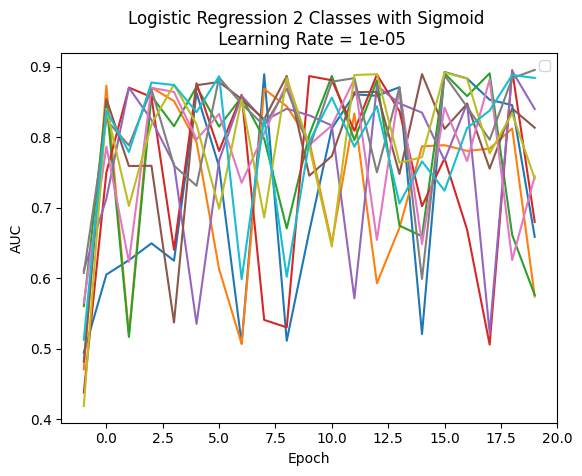


Test set: Avg. loss: 0.011363526344299317, AUC: 0.626294


Test set: Avg. loss: 0.006303309679031372, AUC: 0.730635


Test set: Avg. loss: 0.005144614934921265, AUC: 0.7610405


Test set: Avg. loss: 0.006216289043426514, AUC: 0.7225189999999999


Test set: Avg. loss: 0.00449343991279602, AUC: 0.7654955


Test set: Avg. loss: 0.004313720226287842, AUC: 0.7719805000000001


Test set: Avg. loss: 0.0037834712266922, AUC: 0.7888200000000001


Test set: Avg. loss: 0.0037673078775405885, AUC: 0.805943


Test set: Avg. loss: 0.0035949612855911257, AUC: 0.8081925000000001


Test set: Avg. loss: 0.0036975048780441286, AUC: 0.7851330000000001


Test set: Avg. loss: 0.0036220251321792602, AUC: 0.8168345


Test set: Avg. loss: 0.0034851852655410766, AUC: 0.8159265


Test set: Avg. loss: 0.0033339837789535523, AUC: 0.8164815


Test set: Avg. loss: 0.003452946662902832, AUC: 0.7919265


Test set: Avg. loss: 0.003005453944206238, AUC: 0.814494


Test set: Avg. loss: 0.004291606903076172, AUC: 0.83247


Test set: Avg. loss: 0.004004849553108215, AUC: 0.754075


Test set: Avg. loss: 0.004550374507904052, AUC: 0.7379665


Test set: Avg. loss: 0.0037688021659851075, AUC: 0.7907649999999999


Test set: Avg. loss: 0.004128410935401916, AUC: 0.8029600000000001


Test set: Avg. loss: 0.004514695644378662, AUC: 0.7447819999999999


Test set: Avg. loss: 0.0032508344650268553, AUC: 0.792794


Test set: Avg. loss: 0.0031014989614486692, AUC: 0.7859695


Test set: Avg. loss: 0.0032210992574691773, AUC: 0.8061149999999999


Test set: Avg. loss: 0.002895977973937988, AUC: 0.794058


Test set: Avg. loss: 0.0029764893054962157, AUC: 0.8090729999999999


Test set: Avg. loss: 0.002781668543815613, AUC: 0.7959575


Test set: Avg. loss: 0.0030890220403671266, AUC: 0.816169


Test set: Avg. loss: 0.002640971302986145, AUC: 0.802861


Test set: Avg. loss: 0.0025999535322189333, AUC: 0.7975065


Test set: Avg. loss: 0.0025321877002716063, AUC: 0.8034055


Test set: Avg. loss: 0.002803051829338074, AUC: 0.7

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.002169937252998352, AUC: 0.8280889999999999


Test set: Avg. loss: 0.0026354029178619386, AUC: 0.8390225



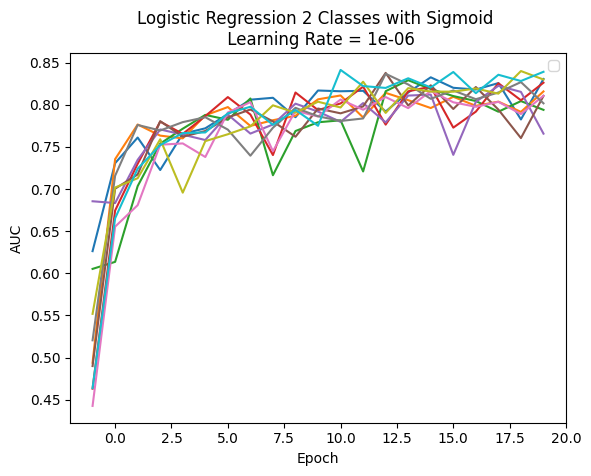


Test set: Avg. loss: 0.07103235244750977, AUC: 0.4995


Test set: Avg. loss: 0.010157727241516113, AUC: 0.606956


Test set: Avg. loss: 0.00905655813217163, AUC: 0.6333894999999999


Test set: Avg. loss: 0.008178236484527588, AUC: 0.642694


Test set: Avg. loss: 0.007615136384963989, AUC: 0.6644515


Test set: Avg. loss: 0.00709985089302063, AUC: 0.6719415


Test set: Avg. loss: 0.0067357754707336424, AUC: 0.6792185


Test set: Avg. loss: 0.006457953929901123, AUC: 0.690596


Test set: Avg. loss: 0.006227697849273682, AUC: 0.69895


Test set: Avg. loss: 0.006001084089279175, AUC: 0.7040555


Test set: Avg. loss: 0.005809938430786133, AUC: 0.7101375000000001


Test set: Avg. loss: 0.005648051977157593, AUC: 0.7156695


Test set: Avg. loss: 0.005520723581314087, AUC: 0.7223665


Test set: Avg. loss: 0.005401036262512207, AUC: 0.7181774999999999


Test set: Avg. loss: 0.0052499229907989504, AUC: 0.728192


Test set: Avg. loss: 0.005191907882690429, AUC: 0.7367935


Test set: Avg. loss: 0


Test set: Avg. loss: 0.007181419610977173, AUC: 0.60093


Test set: Avg. loss: 0.006914697885513306, AUC: 0.6133935


Test set: Avg. loss: 0.006597291231155395, AUC: 0.6336455


Test set: Avg. loss: 0.006393531560897827, AUC: 0.650469


Test set: Avg. loss: 0.006184469938278198, AUC: 0.6565455


Test set: Avg. loss: 0.006038321018218994, AUC: 0.6715015


Test set: Avg. loss: 0.0058654980659484865, AUC: 0.675635


Test set: Avg. loss: 0.005741969108581543, AUC: 0.681063


Test set: Avg. loss: 0.005623832464218139, AUC: 0.687768


Test set: Avg. loss: 0.005511104345321655, AUC: 0.694723


Test set: Avg. loss: 0.005453571081161499, AUC: 0.695038


Test set: Avg. loss: 0.005324551582336426, AUC: 0.7038665


Test set: Avg. loss: 0.005272334098815918, AUC: 0.7050124999999999


Test set: Avg. loss: 0.0051614964008331295, AUC: 0.7123174999999999


Test set: Avg. loss: 0.07796369934082031, AUC: 0.4995


Test set: Avg. loss: 0.009784658908843995, AUC: 0.526063


Test set: Avg. loss: 0.008924270

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.004754160165786743, AUC: 0.7186560000000001


Test set: Avg. loss: 0.004684223175048828, AUC: 0.722648



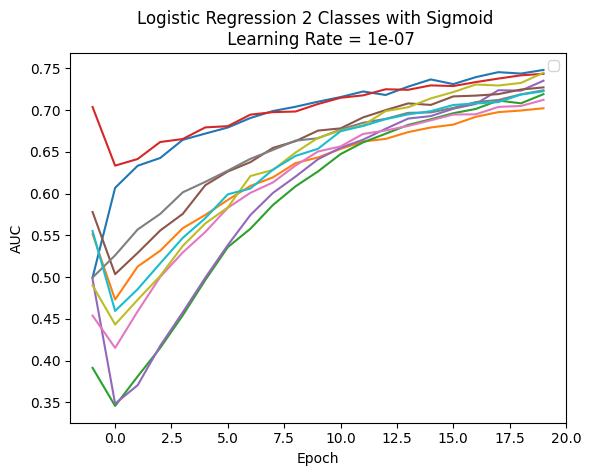

In [137]:
# SIGMOID 2 CLASS 

momentum=0
learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_sigmoid(epoch, train_loader_reduced, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()
   

In [151]:
for name, parameter in network.named_parameters(): 
    print(name)
    print(parameter)
    

fc.weight
Parameter containing:
tensor([[ 0.0016,  0.0094, -0.0084,  ...,  0.0158,  0.0104, -0.0070]],
       requires_grad=True)
fc.bias
Parameter containing:
tensor([-0.0087], requires_grad=True)



Test set: Avg. loss: 0.014437449932098388, AUC: 0.5515


Test set: Avg. loss: 169.2163515625, AUC: 0.7775000000000001


Test set: Avg. loss: 726.31203125, AUC: 0.595


Test set: Avg. loss: 317.8744375, AUC: 0.702


Test set: Avg. loss: 1367.531625, AUC: 0.5229999999999999


Test set: Avg. loss: 1285.1170625, AUC: 0.5275000000000001


Test set: Avg. loss: 254.3541328125, AUC: 0.7364999999999999


Test set: Avg. loss: 190.1018359375, AUC: 0.7785000000000001


Test set: Avg. loss: 403.591578125, AUC: 0.639


Test set: Avg. loss: 458.7200625, AUC: 0.606


Test set: Avg. loss: 127.818640625, AUC: 0.8140000000000001


Test set: Avg. loss: 268.83728125, AUC: 0.735


Test set: Avg. loss: 235.357984375, AUC: 0.753


Test set: Avg. loss: 594.18878125, AUC: 0.5755


Test set: Avg. loss: 275.83603125, AUC: 0.7340000000000001


Test set: Avg. loss: 235.787890625, AUC: 0.749


Test set: Avg. loss: 142.463109375, AUC: 0.8140000000000001


Test set: Avg. loss: 185.14178125, AUC: 0.7785


Test set: Av

KeyboardInterrupt: 

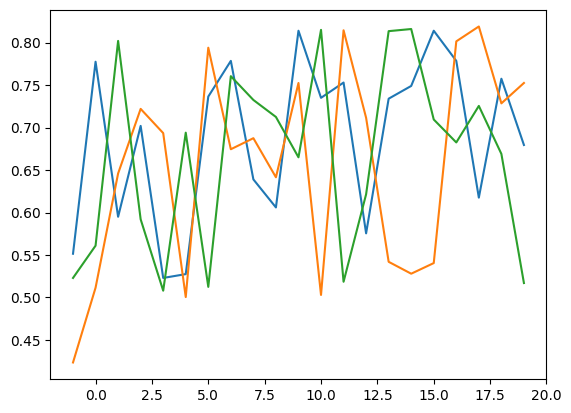

In [136]:
# SOFTMAX 2 CLASS  

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_softmax(epoch, train_loader_reduced, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()
  


Test set: Avg. loss: 0.015225681781768799, AUC: 0.4902635


Test set: Avg. loss: 36.518080078125, AUC: 0.5165


Test set: Avg. loss: 1073.4989375, AUC: 0.5


Test set: Avg. loss: 341.98396875, AUC: 0.5


Test set: Avg. loss: 302.581359375, AUC: 0.5


Test set: Avg. loss: 1356.6489375, AUC: 0.5


Test set: Avg. loss: 67.2443984375, AUC: 0.5435


Test set: Avg. loss: 51.02004296875, AUC: 0.57


Test set: Avg. loss: 148.5241875, AUC: 0.5


Test set: Avg. loss: 72.34478125, AUC: 0.5255


Test set: Avg. loss: 76.19915234375, AUC: 0.5185


Test set: Avg. loss: 434.968234375, AUC: 0.5


Test set: Avg. loss: 199.5825625, AUC: 0.5


Test set: Avg. loss: 688.01784375, AUC: 0.5


Test set: Avg. loss: 160.487453125, AUC: 0.503


Test set: Avg. loss: 563.71353125, AUC: 0.5


Test set: Avg. loss: 30.29716796875, AUC: 0.6614905


Test set: Avg. loss: 144.1820546875, AUC: 0.5045000000000001


Test set: Avg. loss: 81.15063671875, AUC: 0.5585


Test set: Avg. loss: 64.38742578125, AUC: 0.5805


Test se


Test set: Avg. loss: 33.32113671875, AUC: 0.6609999999999999


Test set: Avg. loss: 57.04492578125, AUC: 0.5870000000000001


Test set: Avg. loss: 88.67620703125, AUC: 0.5365


Test set: Avg. loss: 73.79497265625, AUC: 0.5405


Test set: Avg. loss: 779.544875, AUC: 0.5


Test set: Avg. loss: 183.064296875, AUC: 0.5005


Test set: Avg. loss: 71.25270703125, AUC: 0.5365


Test set: Avg. loss: 60.371994140625, AUC: 0.561


Test set: Avg. loss: 0.027680590629577638, AUC: 0.5774565


Test set: Avg. loss: 112.78897265625, AUC: 0.503


Test set: Avg. loss: 745.71403125, AUC: 0.5


Test set: Avg. loss: 80.2842734375, AUC: 0.5095


Test set: Avg. loss: 1044.05734375, AUC: 0.5


Test set: Avg. loss: 47.337529296875, AUC: 0.5940000000000001


Test set: Avg. loss: 50.780435546875, AUC: 0.5700000000000001


Test set: Avg. loss: 60.787037109375, AUC: 0.5615


Test set: Avg. loss: 408.80734375, AUC: 0.5


Test set: Avg. loss: 440.18003125, AUC: 0.5


Test set: Avg. loss: 512.740140625, AUC: 0.5


Te

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 239.658625, AUC: 0.5


Test set: Avg. loss: 1353.0053125, AUC: 0.5


Test set: Avg. loss: 55.693572265625, AUC: 0.5950000000000001



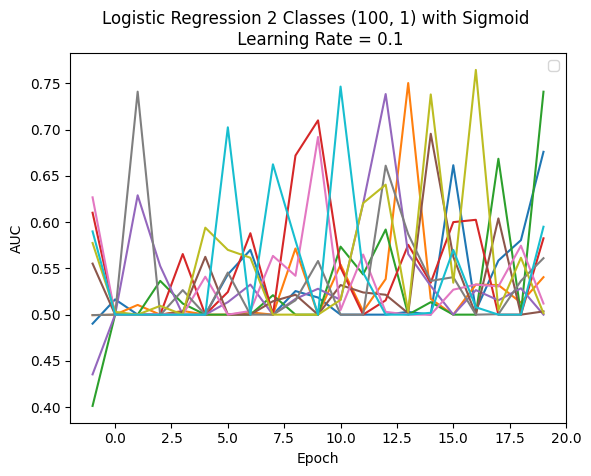


Test set: Avg. loss: 0.012835137367248535, AUC: 0.416537


Test set: Avg. loss: 55.081248046875, AUC: 0.5


Test set: Avg. loss: 124.79211328125, AUC: 0.5


Test set: Avg. loss: 6.07620361328125, AUC: 0.5349894999999999


Test set: Avg. loss: 70.5487734375, AUC: 0.5


Test set: Avg. loss: 71.24717578125, AUC: 0.5


Test set: Avg. loss: 5.448487548828125, AUC: 0.563994


Test set: Avg. loss: 84.53359375, AUC: 0.5


Test set: Avg. loss: 11.159736328125, AUC: 0.5239989999999999


Test set: Avg. loss: 8.0068271484375, AUC: 0.554996


Test set: Avg. loss: 5.73078125, AUC: 0.5884874999999999


Test set: Avg. loss: 8.25004345703125, AUC: 0.5319989999999999


Test set: Avg. loss: 7.30838916015625, AUC: 0.5429989999999999


Test set: Avg. loss: 3.6887335205078124, AUC: 0.62798


Test set: Avg. loss: 9.573341796875, AUC: 0.5155


Test set: Avg. loss: 26.4432421875, AUC: 0.5


Test set: Avg. loss: 6.464050537109375, AUC: 0.5479955


Test set: Avg. loss: 41.271322265625, AUC: 0.5


Test set: Avg.


Test set: Avg. loss: 2.0877667846679686, AUC: 0.626676


Test set: Avg. loss: 88.7688203125, AUC: 0.5


Test set: Avg. loss: 92.20398046875, AUC: 0.5


Test set: Avg. loss: 12.64288623046875, AUC: 0.5094995


Test set: Avg. loss: 1.4916030883789062, AUC: 0.7709415


Test set: Avg. loss: 28.263896484375, AUC: 0.5


Test set: Avg. loss: 47.4817109375, AUC: 0.5


Test set: Avg. loss: 5.59106005859375, AUC: 0.580994


Test set: Avg. loss: 48.202884765625, AUC: 0.5


Test set: Avg. loss: 4.85533447265625, AUC: 0.5784955


Test set: Avg. loss: 112.087703125, AUC: 0.5


Test set: Avg. loss: 4.65698388671875, AUC: 0.639958


Test set: Avg. loss: 8.48108154296875, AUC: 0.537


Test set: Avg. loss: 5.805515625, AUC: 0.579498


Test set: Avg. loss: 31.603970703125, AUC: 0.5


Test set: Avg. loss: 8.054629150390625, AUC: 0.544497


Test set: Avg. loss: 6.92645556640625, AUC: 0.5585609999999999


Test set: Avg. loss: 43.925791015625, AUC: 0.5


Test set: Avg. loss: 6.095114013671875, AUC: 0.566997

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 19.5739365234375, AUC: 0.501


Test set: Avg. loss: 10.521373046875, AUC: 0.5184995


Test set: Avg. loss: 4.975120849609375, AUC: 0.595967



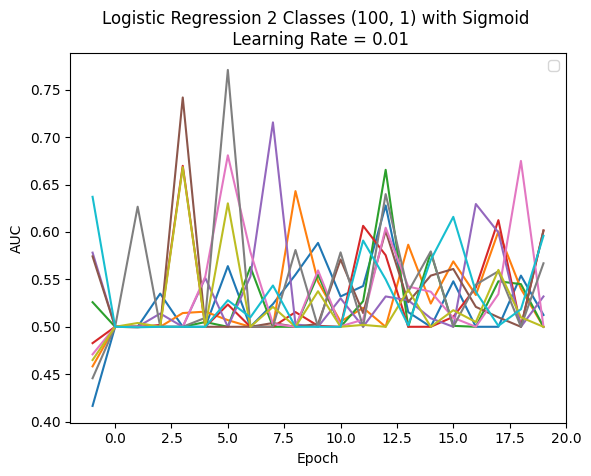


Test set: Avg. loss: 0.08096030044555665, AUC: 0.499501


Test set: Avg. loss: 7.43940576171875, AUC: 0.5


Test set: Avg. loss: 4.690041015625, AUC: 0.5


Test set: Avg. loss: 7.161631591796875, AUC: 0.5


Test set: Avg. loss: 8.909990234375, AUC: 0.5


Test set: Avg. loss: 0.6735802001953125, AUC: 0.5239955


Test set: Avg. loss: 5.720941162109375, AUC: 0.5


Test set: Avg. loss: 9.59913671875, AUC: 0.5


Test set: Avg. loss: 4.44104296875, AUC: 0.5


Test set: Avg. loss: 4.413938720703125, AUC: 0.5


Test set: Avg. loss: 0.9864335327148438, AUC: 0.523015


Test set: Avg. loss: 0.7124068298339844, AUC: 0.5530284999999999


Test set: Avg. loss: 0.4854777374267578, AUC: 0.5904969999999999


Test set: Avg. loss: 1.5174729614257811, AUC: 0.5025


Test set: Avg. loss: 2.102099609375, AUC: 0.5


Test set: Avg. loss: 18.8776923828125, AUC: 0.5


Test set: Avg. loss: 1.9908538818359376, AUC: 0.5039994999999999


Test set: Avg. loss: 1.277806884765625, AUC: 0.5150104999999999


Test set: Avg


Test set: Avg. loss: 2.141024169921875, AUC: 0.5


Test set: Avg. loss: 0.3112449035644531, AUC: 0.6725585000000001


Test set: Avg. loss: 0.03245796489715576, AUC: 0.5049899999999999


Test set: Avg. loss: 19.99011328125, AUC: 0.5


Test set: Avg. loss: 3.1018798828125, AUC: 0.5


Test set: Avg. loss: 18.4917001953125, AUC: 0.5


Test set: Avg. loss: 1.6141526489257811, AUC: 0.508499


Test set: Avg. loss: 3.54953369140625, AUC: 0.5


Test set: Avg. loss: 1.3217009887695312, AUC: 0.5029984999999999


Test set: Avg. loss: 1.3679899291992188, AUC: 0.5010004999999998


Test set: Avg. loss: 1.37103271484375, AUC: 0.5015


Test set: Avg. loss: 1.1294131469726563, AUC: 0.5074975


Test set: Avg. loss: 0.6910108032226563, AUC: 0.5369935


Test set: Avg. loss: 2.9329627685546873, AUC: 0.5


Test set: Avg. loss: 1.0471661987304688, AUC: 0.512498


Test set: Avg. loss: 0.5467696838378906, AUC: 0.5860154999999999


Test set: Avg. loss: 0.6798648681640626, AUC: 0.5524760000000001


Test set: Avg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.1928114700317383, AUC: 0.735497


Test set: Avg. loss: 0.6702511291503906, AUC: 0.54456


Test set: Avg. loss: 0.7163930969238281, AUC: 0.538033



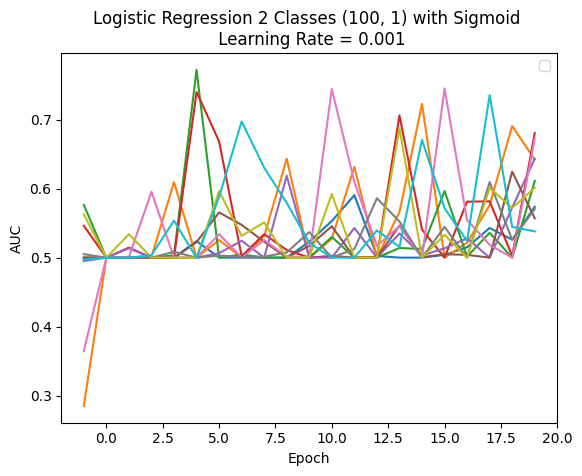


Test set: Avg. loss: 0.073259033203125, AUC: 0.5499415


Test set: Avg. loss: 0.28614991760253905, AUC: 0.5


Test set: Avg. loss: 0.036911550521850585, AUC: 0.7600009999999999


Test set: Avg. loss: 0.07345748138427734, AUC: 0.6079720000000001


Test set: Avg. loss: 1.500397705078125, AUC: 0.5


Test set: Avg. loss: 0.08369408416748046, AUC: 0.622087


Test set: Avg. loss: 0.1154647216796875, AUC: 0.543546


Test set: Avg. loss: 0.030120408058166504, AUC: 0.7987835


Test set: Avg. loss: 0.5845888366699219, AUC: 0.5


Test set: Avg. loss: 0.057016700744628904, AUC: 0.703974


Test set: Avg. loss: 0.16844406127929687, AUC: 0.506496


Test set: Avg. loss: 0.6227144165039062, AUC: 0.5


Test set: Avg. loss: 0.10933036041259765, AUC: 0.559818


Test set: Avg. loss: 0.5942390747070313, AUC: 0.5


Test set: Avg. loss: 0.1044515037536621, AUC: 0.5702965000000001


Test set: Avg. loss: 0.07755255508422852, AUC: 0.6324005


Test set: Avg. loss: 0.11709104919433594, AUC: 0.5540355


Test set: 


Test set: Avg. loss: 0.28053262329101564, AUC: 0.5029975


Test set: Avg. loss: 0.05914258575439453, AUC: 0.7113375


Test set: Avg. loss: 0.043317432403564456, AUC: 0.763057


Test set: Avg. loss: 0.1057763900756836, AUC: 0.569125


Test set: Avg. loss: 0.039784818649291995, AUC: 0.764689


Test set: Avg. loss: 0.16396825408935548, AUC: 0.5189885


Test set: Avg. loss: 0.049224613189697265, AUC: 0.7334990000000001


Test set: Avg. loss: 0.024702603340148926, AUC: 0.8193765000000001


Test set: Avg. loss: 0.04794823837280274, AUC: 0.4645215000000001


Test set: Avg. loss: 0.8747318725585937, AUC: 0.5


Test set: Avg. loss: 0.2704708862304688, AUC: 0.4995


Test set: Avg. loss: 0.555794189453125, AUC: 0.5


Test set: Avg. loss: 0.09536251831054687, AUC: 0.5750095000000001


Test set: Avg. loss: 1.0930147705078126, AUC: 0.5


Test set: Avg. loss: 0.05295773124694824, AUC: 0.7142004999999999


Test set: Avg. loss: 1.6074534912109375, AUC: 0.5


Test set: Avg. loss: 0.10128461074829101, A

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.05581072807312012, AUC: 0.708885


Test set: Avg. loss: 0.1181148910522461, AUC: 0.548521



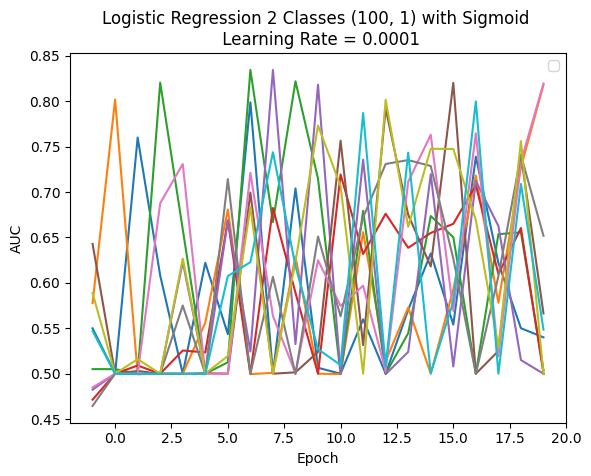


Test set: Avg. loss: 0.01753719711303711, AUC: 0.34836900000000004


Test set: Avg. loss: 0.04154083251953125, AUC: 0.5950860000000001


Test set: Avg. loss: 0.027974549293518065, AUC: 0.615419


Test set: Avg. loss: 0.027338969230651856, AUC: 0.667748


Test set: Avg. loss: 0.02443395519256592, AUC: 0.6979559999999999


Test set: Avg. loss: 0.02156812572479248, AUC: 0.707815


Test set: Avg. loss: 0.024951757431030272, AUC: 0.739743


Test set: Avg. loss: 0.020786152839660645, AUC: 0.7496979999999999


Test set: Avg. loss: 0.01856943416595459, AUC: 0.7576394999999999


Test set: Avg. loss: 0.015112656116485596, AUC: 0.7501175


Test set: Avg. loss: 0.016442770957946776, AUC: 0.7557985


Test set: Avg. loss: 0.012496549606323243, AUC: 0.7434175


Test set: Avg. loss: 0.024323275566101074, AUC: 0.7800740000000002


Test set: Avg. loss: 0.017104936599731446, AUC: 0.7660290000000001


Test set: Avg. loss: 0.01675971221923828, AUC: 0.7710910000000001


Test set: Avg. loss: 0.0218261480331


Test set: Avg. loss: 0.016726325035095215, AUC: 0.6646779999999999


Test set: Avg. loss: 0.02529611396789551, AUC: 0.7112100000000001


Test set: Avg. loss: 0.022486321449279784, AUC: 0.7231185000000001


Test set: Avg. loss: 0.014985981941223145, AUC: 0.7075009999999999


Test set: Avg. loss: 0.017377540588378905, AUC: 0.73061


Test set: Avg. loss: 0.01854797077178955, AUC: 0.7424929999999998


Test set: Avg. loss: 0.024430829048156737, AUC: 0.7525430000000001


Test set: Avg. loss: 0.015024215698242187, AUC: 0.740173


Test set: Avg. loss: 0.017140356063842774, AUC: 0.7555314999999999


Test set: Avg. loss: 0.017026242256164552, AUC: 0.7592445


Test set: Avg. loss: 0.012930671215057372, AUC: 0.7498279999999999


Test set: Avg. loss: 0.017056011199951173, AUC: 0.7703175


Test set: Avg. loss: 0.019242701530456544, AUC: 0.7772075


Test set: Avg. loss: 0.018452903747558595, AUC: 0.7767775


Test set: Avg. loss: 0.015375234127044678, AUC: 0.7734935000000001


Test set: Avg. loss: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.014558938026428223, AUC: 0.7979560000000001


Test set: Avg. loss: 0.015417999744415283, AUC: 0.806205



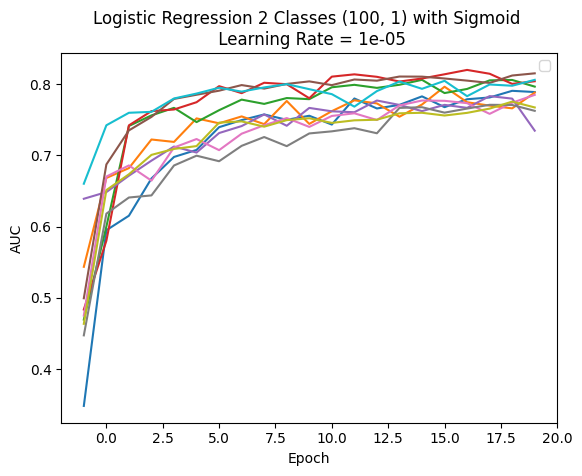


Test set: Avg. loss: 0.011959997653961182, AUC: 0.5728995


Test set: Avg. loss: 0.027724027633666992, AUC: 0.7186315


Test set: Avg. loss: 0.02744986343383789, AUC: 0.7215055


Test set: Avg. loss: 0.027444154739379882, AUC: 0.7251685


Test set: Avg. loss: 0.026842491149902344, AUC: 0.726388


Test set: Avg. loss: 0.027460201263427735, AUC: 0.7294064999999998


Test set: Avg. loss: 0.02513925075531006, AUC: 0.7297795


Test set: Avg. loss: 0.027735488891601563, AUC: 0.733514


Test set: Avg. loss: 0.02507865047454834, AUC: 0.733281


Test set: Avg. loss: 0.024400421142578125, AUC: 0.7334999999999999


Test set: Avg. loss: 0.025407614707946776, AUC: 0.736627


Test set: Avg. loss: 0.024960089683532714, AUC: 0.7377065


Test set: Avg. loss: 0.026059303283691406, AUC: 0.741115


Test set: Avg. loss: 0.02421660041809082, AUC: 0.7392745000000001


Test set: Avg. loss: 0.024359972953796386, AUC: 0.740831


Test set: Avg. loss: 0.023235998153686523, AUC: 0.7406955000000001


Test set: Avg


Test set: Avg. loss: 0.03949881935119629, AUC: 0.677341


Test set: Avg. loss: 0.036801708221435546, AUC: 0.6849925


Test set: Avg. loss: 0.03644032859802246, AUC: 0.689045


Test set: Avg. loss: 0.03413465309143066, AUC: 0.69399


Test set: Avg. loss: 0.030983488082885743, AUC: 0.6972909999999999


Test set: Avg. loss: 0.029490931510925293, AUC: 0.6988949999999999


Test set: Avg. loss: 0.029539979934692383, AUC: 0.7009434999999998


Test set: Avg. loss: 0.029837538719177246, AUC: 0.703343


Test set: Avg. loss: 0.028976255416870118, AUC: 0.7041115


Test set: Avg. loss: 0.027971776008605957, AUC: 0.7057840000000001


Test set: Avg. loss: 0.02601037883758545, AUC: 0.7041139999999999


Test set: Avg. loss: 0.026334726333618164, AUC: 0.7063735


Test set: Avg. loss: 0.02528897762298584, AUC: 0.706612


Test set: Avg. loss: 0.0236775598526001, AUC: 0.705404


Test set: Avg. loss: 0.02377537441253662, AUC: 0.706803


Test set: Avg. loss: 0.022576684951782226, AUC: 0.706793


Test set: A

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.019808745384216307, AUC: 0.7342235


Test set: Avg. loss: 0.020897624015808105, AUC: 0.7388345000000001



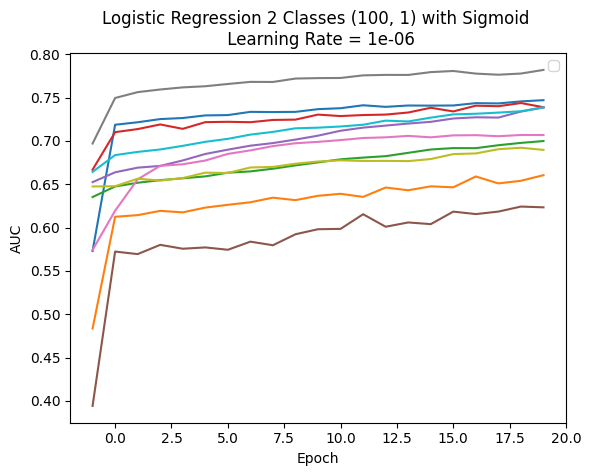


Test set: Avg. loss: 0.06974255752563477, AUC: 0.48800499999999997


Test set: Avg. loss: 0.019774660110473633, AUC: 0.619132


Test set: Avg. loss: 0.02448535919189453, AUC: 0.6406505


Test set: Avg. loss: 0.026607850074768066, AUC: 0.6473059999999999


Test set: Avg. loss: 0.027834604263305664, AUC: 0.6515540000000001


Test set: Avg. loss: 0.02856950855255127, AUC: 0.6536045


Test set: Avg. loss: 0.029121838569641113, AUC: 0.6560029999999999


Test set: Avg. loss: 0.029511414527893066, AUC: 0.6576059999999999


Test set: Avg. loss: 0.02977220821380615, AUC: 0.658844


Test set: Avg. loss: 0.029924585342407228, AUC: 0.6595900000000001


Test set: Avg. loss: 0.030054226875305175, AUC: 0.6602555000000001


Test set: Avg. loss: 0.030141496658325197, AUC: 0.66116


Test set: Avg. loss: 0.030254128456115723, AUC: 0.6618079999999998


Test set: Avg. loss: 0.030272429466247558, AUC: 0.6625805


Test set: Avg. loss: 0.030257375717163085, AUC: 0.6630790000000001


Test set: Avg. loss: 0.03


Test set: Avg. loss: 0.03539576530456543, AUC: 0.5809399999999999


Test set: Avg. loss: 0.03626838302612305, AUC: 0.5823280000000001


Test set: Avg. loss: 0.03686575317382813, AUC: 0.5828614999999999


Test set: Avg. loss: 0.03729729843139649, AUC: 0.585522


Test set: Avg. loss: 0.03762405204772949, AUC: 0.5864750000000001


Test set: Avg. loss: 0.03783074569702148, AUC: 0.5867574999999999


Test set: Avg. loss: 0.03796821403503418, AUC: 0.5863825


Test set: Avg. loss: 0.03803614616394043, AUC: 0.587153


Test set: Avg. loss: 0.03802193832397461, AUC: 0.5876025


Test set: Avg. loss: 0.03804790306091309, AUC: 0.5877625000000001


Test set: Avg. loss: 0.038056978225708006, AUC: 0.588133


Test set: Avg. loss: 0.038028926849365235, AUC: 0.58835


Test set: Avg. loss: 0.037936279296875, AUC: 0.589438


Test set: Avg. loss: 0.037895387649536136, AUC: 0.5893435


Test set: Avg. loss: 0.037843807220458985, AUC: 0.5897699999999999


Test set: Avg. loss: 0.03778433799743652, AUC: 0.590465

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.03059905529022217, AUC: 0.6316915


Test set: Avg. loss: 0.030454648971557616, AUC: 0.631425


Test set: Avg. loss: 0.030333043098449707, AUC: 0.6309205



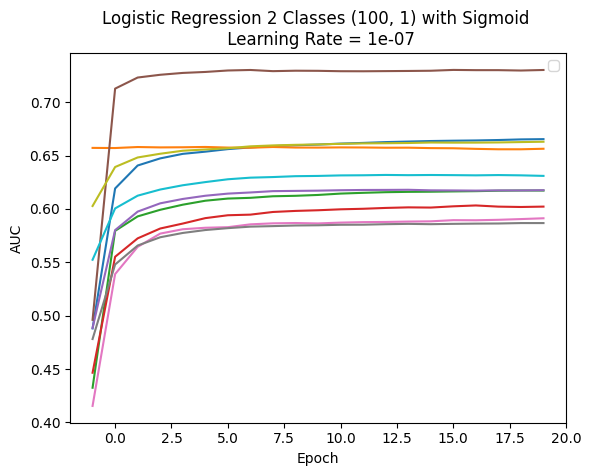

In [147]:
# SIGMOID 2 CLASS RATIO


learning_rates = [0.01, 0.001, 0.0001, 1e-5, 1e-6, 5e-7, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_sigmoid(epoch, train_loader_ratio, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()
   


Test set: Avg. loss: 0.040593267440795895, AUC: 0.45349999999999996


Test set: Avg. loss: 234.0975703125, AUC: 0.506


Test set: Avg. loss: 3957.649375, AUC: 0.5


Test set: Avg. loss: 1974.0780625, AUC: 0.5


Test set: Avg. loss: 156.4368515625, AUC: 0.6805


Test set: Avg. loss: 1373.8634375, AUC: 0.5


Test set: Avg. loss: 249.5958671875, AUC: 0.661


Test set: Avg. loss: 2482.593625, AUC: 0.5


Test set: Avg. loss: 512.2035625, AUC: 0.5700000000000001


Test set: Avg. loss: 255.4443671875, AUC: 0.69


Test set: Avg. loss: 1885.75825, AUC: 0.5


Test set: Avg. loss: 250.437859375, AUC: 0.7134999999999999


Test set: Avg. loss: 1607.9588125, AUC: 0.5025


Test set: Avg. loss: 239.4950859375, AUC: 0.721


Test set: Avg. loss: 1503.2704375, AUC: 0.5015000000000001


Test set: Avg. loss: 247.4007265625, AUC: 0.7264999999999999


Test set: Avg. loss: 1416.753, AUC: 0.504


Test set: Avg. loss: 258.719375, AUC: 0.73


Test set: Avg. loss: 1359.4430625, AUC: 0.5085


Test set: Avg. loss:


Test set: Avg. loss: 1260.4184375, AUC: 0.514


Test set: Avg. loss: 274.93759375, AUC: 0.7330000000000001


Test set: Avg. loss: 0.09288997268676757, AUC: 0.5


Test set: Avg. loss: 1516.2859375, AUC: 0.5


Test set: Avg. loss: 2555.52075, AUC: 0.5


Test set: Avg. loss: 572.2780625, AUC: 0.5015


Test set: Avg. loss: 785.959875, AUC: 0.5165


Test set: Avg. loss: 2733.986125, AUC: 0.5


Test set: Avg. loss: 744.11315625, AUC: 0.51


Test set: Avg. loss: 335.316984375, AUC: 0.6465000000000001


Test set: Avg. loss: 2121.7441875, AUC: 0.5


Test set: Avg. loss: 304.48634375, AUC: 0.6715


Test set: Avg. loss: 1123.622, AUC: 0.5055000000000001


Test set: Avg. loss: 317.33115625, AUC: 0.6839999999999999


Test set: Avg. loss: 1490.6335, AUC: 0.502


Test set: Avg. loss: 248.347734375, AUC: 0.717


Test set: Avg. loss: 1419.8160625, AUC: 0.502


Test set: Avg. loss: 261.171421875, AUC: 0.727


Test set: Avg. loss: 1389.5641875, AUC: 0.505


Test set: Avg. loss: 267.48571875, AUC: 0.73



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 1270.9921875, AUC: 0.5145



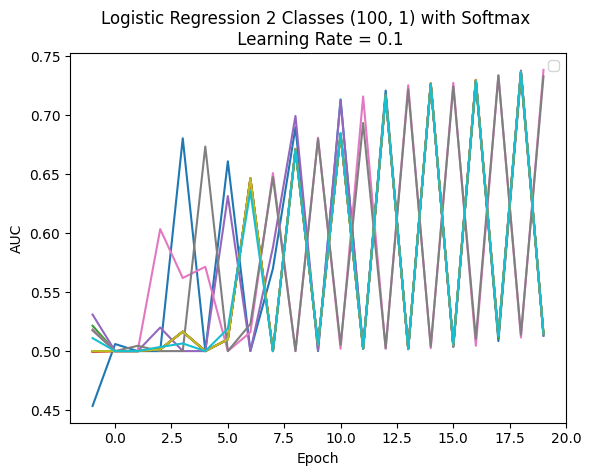


Test set: Avg. loss: 0.0396097354888916, AUC: 0.5395


Test set: Avg. loss: 444.283875, AUC: 0.5


Test set: Avg. loss: 245.9267421875, AUC: 0.5


Test set: Avg. loss: 47.7025, AUC: 0.503


Test set: Avg. loss: 86.5731953125, AUC: 0.5085


Test set: Avg. loss: 268.70103125, AUC: 0.5


Test set: Avg. loss: 69.9141875, AUC: 0.517


Test set: Avg. loss: 36.007546875, AUC: 0.6359999999999999


Test set: Avg. loss: 216.4141171875, AUC: 0.5


Test set: Avg. loss: 32.410568359375, AUC: 0.66


Test set: Avg. loss: 107.65347265625, AUC: 0.507


Test set: Avg. loss: 29.9638349609375, AUC: 0.6869999999999999


Test set: Avg. loss: 151.5195390625, AUC: 0.502


Test set: Avg. loss: 24.783333984375, AUC: 0.7155


Test set: Avg. loss: 143.013546875, AUC: 0.502


Test set: Avg. loss: 25.9007919921875, AUC: 0.7265000000000001


Test set: Avg. loss: 139.9798359375, AUC: 0.504


Test set: Avg. loss: 26.546009765625, AUC: 0.7285


Test set: Avg. loss: 130.0196171875, AUC: 0.5105000000000001


Test set: A


Test set: Avg. loss: 148.8376875, AUC: 0.502


Test set: Avg. loss: 24.99639453125, AUC: 0.7164999999999999


Test set: Avg. loss: 141.760765625, AUC: 0.5025


Test set: Avg. loss: 26.2761435546875, AUC: 0.7264999999999999


Test set: Avg. loss: 138.74221875, AUC: 0.506


Test set: Avg. loss: 26.9071806640625, AUC: 0.7290000000000001


Test set: Avg. loss: 128.8367109375, AUC: 0.5125000000000001


Test set: Avg. loss: 26.875447265625, AUC: 0.7354999999999999


Test set: Avg. loss: 126.5975859375, AUC: 0.515


Test set: Avg. loss: 0.030545065879821778, AUC: 0.516


Test set: Avg. loss: 106.48623046875, AUC: 0.5


Test set: Avg. loss: 312.440375, AUC: 0.5


Test set: Avg. loss: 114.08323046875, AUC: 0.5


Test set: Avg. loss: 42.343939453125, AUC: 0.566


Test set: Avg. loss: 291.760421875, AUC: 0.5


Test set: Avg. loss: 92.3303671875, AUC: 0.5025000000000001


Test set: Avg. loss: 42.168009765625, AUC: 0.6155


Test set: Avg. loss: 214.4854375, AUC: 0.5


Test set: Avg. loss: 31.42128

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 126.73914453125, AUC: 0.515



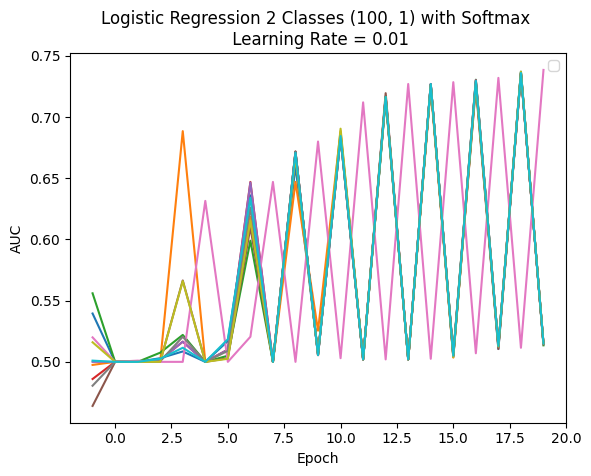


Test set: Avg. loss: 0.16110791778564454, AUC: 0.5


Test set: Avg. loss: 15.03507421875, AUC: 0.5


Test set: Avg. loss: 25.7153876953125, AUC: 0.5


Test set: Avg. loss: 5.88195849609375, AUC: 0.5025


Test set: Avg. loss: 7.7351279296875, AUC: 0.5175


Test set: Avg. loss: 27.2309814453125, AUC: 0.5


Test set: Avg. loss: 7.33519873046875, AUC: 0.513


Test set: Avg. loss: 3.396802001953125, AUC: 0.6425


Test set: Avg. loss: 21.2131494140625, AUC: 0.5


Test set: Avg. loss: 3.031682373046875, AUC: 0.6715


Test set: Avg. loss: 11.41638818359375, AUC: 0.504


Test set: Avg. loss: 3.1139146728515623, AUC: 0.6869999999999999


Test set: Avg. loss: 15.08843212890625, AUC: 0.502


Test set: Avg. loss: 2.473822265625, AUC: 0.718


Test set: Avg. loss: 14.3795498046875, AUC: 0.502


Test set: Avg. loss: 2.5903118896484374, AUC: 0.726


Test set: Avg. loss: 14.076203125, AUC: 0.504


Test set: Avg. loss: 2.656404296875, AUC: 0.7275


Test set: Avg. loss: 13.06196826171875, AUC: 0.511


Te


Test set: Avg. loss: 30.6008037109375, AUC: 0.5


Test set: Avg. loss: 10.7650888671875, AUC: 0.5


Test set: Avg. loss: 4.088840942382813, AUC: 0.604


Test set: Avg. loss: 24.56851953125, AUC: 0.5


Test set: Avg. loss: 4.8019912109375, AUC: 0.574


Test set: Avg. loss: 2.340895751953125, AUC: 0.7069999999999999


Test set: Avg. loss: 18.8247236328125, AUC: 0.5


Test set: Avg. loss: 2.4901649169921876, AUC: 0.7145


Test set: Avg. loss: 15.8438642578125, AUC: 0.502


Test set: Avg. loss: 2.365822021484375, AUC: 0.7215


Test set: Avg. loss: 15.11331884765625, AUC: 0.5015000000000001


Test set: Avg. loss: 2.44196630859375, AUC: 0.725


Test set: Avg. loss: 14.95475732421875, AUC: 0.502


Test set: Avg. loss: 2.5315609130859373, AUC: 0.729


Test set: Avg. loss: 13.22204150390625, AUC: 0.5085


Test set: Avg. loss: 2.5876033935546876, AUC: 0.7365


Test set: Avg. loss: 12.7709521484375, AUC: 0.512


Test set: Avg. loss: 0.02763459777832031, AUC: 0.5325


Test set: Avg. loss: 28.6257

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 12.68965869140625, AUC: 0.5145



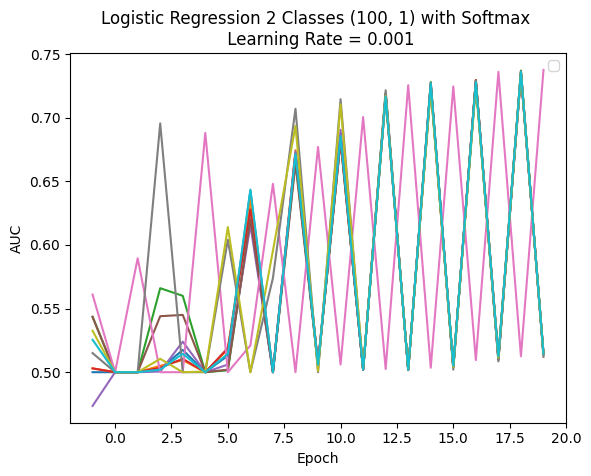


Test set: Avg. loss: 0.025311613082885744, AUC: 0.46099999999999997


Test set: Avg. loss: 0.22831706237792967, AUC: 0.508


Test set: Avg. loss: 3.959624755859375, AUC: 0.5


Test set: Avg. loss: 1.9760535278320313, AUC: 0.5


Test set: Avg. loss: 0.15171053314208985, AUC: 0.6769999999999999


Test set: Avg. loss: 1.5736610107421876, AUC: 0.5


Test set: Avg. loss: 0.19022267913818358, AUC: 0.693


Test set: Avg. loss: 2.458617431640625, AUC: 0.5


Test set: Avg. loss: 0.49041258239746094, AUC: 0.5720000000000001


Test set: Avg. loss: 0.23292499542236328, AUC: 0.705


Test set: Avg. loss: 1.8812183227539063, AUC: 0.5


Test set: Avg. loss: 0.24760255432128905, AUC: 0.713


Test set: Avg. loss: 1.5830971069335937, AUC: 0.5025


Test set: Avg. loss: 0.23615430450439454, AUC: 0.7210000000000001


Test set: Avg. loss: 1.5098715209960938, AUC: 0.502


Test set: Avg. loss: 0.24363079833984375, AUC: 0.7270000000000001


Test set: Avg. loss: 1.4124188232421875, AUC: 0.503


Test set: Avg. l


Test set: Avg. loss: 0.019646396636962892, AUC: 0.5285


Test set: Avg. loss: 2.6986571044921877, AUC: 0.5


Test set: Avg. loss: 0.7150857543945313, AUC: 0.5


Test set: Avg. loss: 0.8051631164550781, AUC: 0.503


Test set: Avg. loss: 2.9945576171875, AUC: 0.5


Test set: Avg. loss: 1.0005159606933594, AUC: 0.5005


Test set: Avg. loss: 0.39685296630859374, AUC: 0.6104999999999999


Test set: Avg. loss: 2.3815394287109375, AUC: 0.5


Test set: Avg. loss: 0.4300967559814453, AUC: 0.5925


Test set: Avg. loss: 0.23331685638427735, AUC: 0.7104999999999999


Test set: Avg. loss: 1.7880813598632812, AUC: 0.5005


Test set: Avg. loss: 0.23708455657958985, AUC: 0.7160000000000001


Test set: Avg. loss: 1.5878326416015625, AUC: 0.502


Test set: Avg. loss: 0.23604082489013672, AUC: 0.7184999999999999


Test set: Avg. loss: 1.5203123779296874, AUC: 0.502


Test set: Avg. loss: 0.2438071823120117, AUC: 0.7264999999999999


Test set: Avg. loss: 1.4136434936523437, AUC: 0.5035


Test set: Avg. l

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 1.2670632934570312, AUC: 0.513



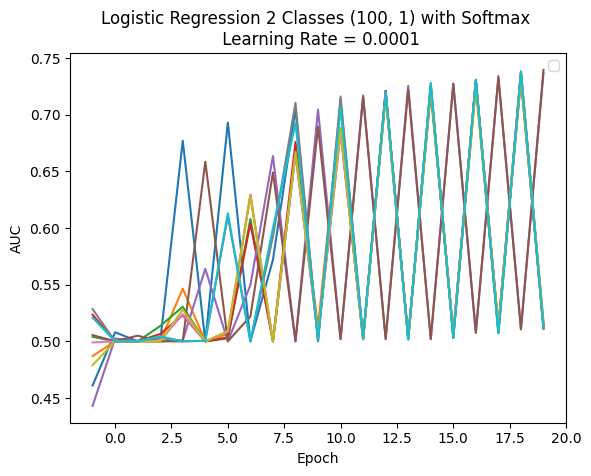


Test set: Avg. loss: 0.03457839393615723, AUC: 0.5169999999999999


Test set: Avg. loss: 0.3719818115234375, AUC: 0.5


Test set: Avg. loss: 0.17362470245361328, AUC: 0.5


Test set: Avg. loss: 0.01297997236251831, AUC: 0.6605


Test set: Avg. loss: 0.3041784973144531, AUC: 0.5


Test set: Avg. loss: 0.10581411361694336, AUC: 0.5005


Test set: Avg. loss: 0.04209376335144043, AUC: 0.595


Test set: Avg. loss: 0.24910777282714844, AUC: 0.5


Test set: Avg. loss: 0.049121335983276365, AUC: 0.579


Test set: Avg. loss: 0.021382694244384767, AUC: 0.7050000000000001


Test set: Avg. loss: 0.18736341857910158, AUC: 0.5005


Test set: Avg. loss: 0.02481825065612793, AUC: 0.7064999999999999


Test set: Avg. loss: 0.14990056610107422, AUC: 0.5015


Test set: Avg. loss: 0.02536327362060547, AUC: 0.7175


Test set: Avg. loss: 0.14996300506591798, AUC: 0.5005


Test set: Avg. loss: 0.026475679397583007, AUC: 0.7204999999999999


Test set: Avg. loss: 0.13401097106933593, AUC: 0.505


Test set: Avg


Test set: Avg. loss: 0.11233268356323242, AUC: 0.523


Test set: Avg. loss: 0.028620409965515136, AUC: 0.7345


Test set: Avg. loss: 0.11196355056762695, AUC: 0.5269999999999999


Test set: Avg. loss: 0.028659579277038574, AUC: 0.741


Test set: Avg. loss: 0.02021872329711914, AUC: 0.554


Test set: Avg. loss: 0.2164036407470703, AUC: 0.5


Test set: Avg. loss: 0.028565555572509765, AUC: 0.551


Test set: Avg. loss: 0.03683842086791992, AUC: 0.5385


Test set: Avg. loss: 0.02417831230163574, AUC: 0.6465000000000001


Test set: Avg. loss: 0.17917186737060548, AUC: 0.5


Test set: Avg. loss: 0.024178120613098146, AUC: 0.6795


Test set: Avg. loss: 0.1907923583984375, AUC: 0.5


Test set: Avg. loss: 0.0256120023727417, AUC: 0.6875000000000001


Test set: Avg. loss: 0.1645897674560547, AUC: 0.501


Test set: Avg. loss: 0.025653334617614747, AUC: 0.7089999999999999


Test set: Avg. loss: 0.15790314483642579, AUC: 0.5005


Test set: Avg. loss: 0.02578894329071045, AUC: 0.714


Test set: Avg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.11739430236816406, AUC: 0.5195000000000001



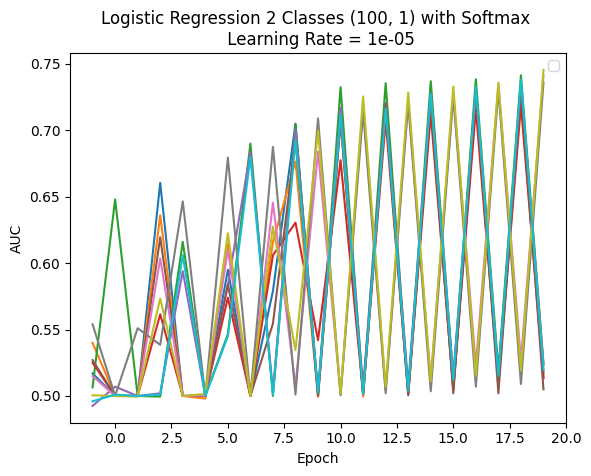


Test set: Avg. loss: 0.06899052429199219, AUC: 0.5045000000000001


Test set: Avg. loss: 0.03739825248718262, AUC: 0.5319999999999999


Test set: Avg. loss: 0.024843342781066896, AUC: 0.5680000000000001


Test set: Avg. loss: 0.023734546661376952, AUC: 0.5730000000000001


Test set: Avg. loss: 0.023162226676940918, AUC: 0.572


Test set: Avg. loss: 0.022594172477722167, AUC: 0.5765


Test set: Avg. loss: 0.02201058292388916, AUC: 0.5775


Test set: Avg. loss: 0.021364933013916017, AUC: 0.579


Test set: Avg. loss: 0.020708786964416505, AUC: 0.5795


Test set: Avg. loss: 0.020048041343688965, AUC: 0.5805


Test set: Avg. loss: 0.019452411651611327, AUC: 0.5830000000000001


Test set: Avg. loss: 0.018955583572387694, AUC: 0.584


Test set: Avg. loss: 0.018540244102478027, AUC: 0.5865


Test set: Avg. loss: 0.018203988075256347, AUC: 0.5880000000000001


Test set: Avg. loss: 0.017909582138061524, AUC: 0.5895


Test set: Avg. loss: 0.01761852550506592, AUC: 0.5915


Test set: Avg. loss: 0


Test set: Avg. loss: 0.012050286293029785, AUC: 0.5675


Test set: Avg. loss: 0.011710289955139161, AUC: 0.574


Test set: Avg. loss: 0.011397558212280274, AUC: 0.577


Test set: Avg. loss: 0.011147908210754395, AUC: 0.58


Test set: Avg. loss: 0.01094449806213379, AUC: 0.585


Test set: Avg. loss: 0.01076221990585327, AUC: 0.5890000000000001


Test set: Avg. loss: 0.010585713863372802, AUC: 0.5915


Test set: Avg. loss: 0.010400351524353027, AUC: 0.592


Test set: Avg. loss: 0.02601398181915283, AUC: 0.505


Test set: Avg. loss: 0.023015135765075682, AUC: 0.5145


Test set: Avg. loss: 0.020648601531982422, AUC: 0.519


Test set: Avg. loss: 0.019033761978149415, AUC: 0.5265


Test set: Avg. loss: 0.017526248931884765, AUC: 0.5334999999999999


Test set: Avg. loss: 0.015936158180236817, AUC: 0.544


Test set: Avg. loss: 0.014632882595062256, AUC: 0.5549999999999999


Test set: Avg. loss: 0.013662264823913575, AUC: 0.5625


Test set: Avg. loss: 0.012888899803161621, AUC: 0.5725


Test s

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.00918089771270752, AUC: 0.6695



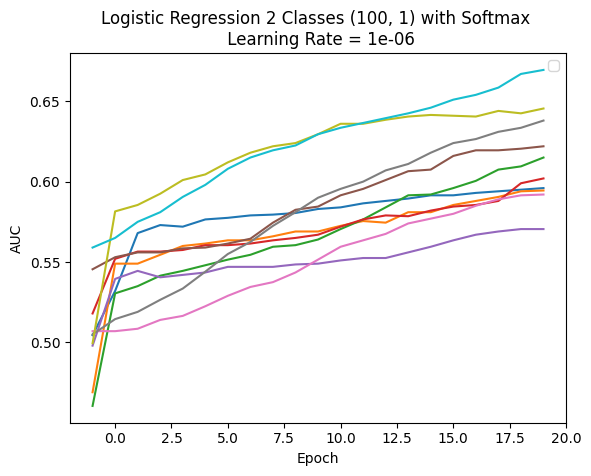


Test set: Avg. loss: 0.0676060905456543, AUC: 0.4835


Test set: Avg. loss: 0.03379512023925781, AUC: 0.5135


Test set: Avg. loss: 0.03808950042724609, AUC: 0.5089999999999999


Test set: Avg. loss: 0.03984568595886231, AUC: 0.5069999999999999


Test set: Avg. loss: 0.04073841667175293, AUC: 0.507


Test set: Avg. loss: 0.041267879486083986, AUC: 0.5065


Test set: Avg. loss: 0.04154014587402344, AUC: 0.505


Test set: Avg. loss: 0.04165873146057129, AUC: 0.5055


Test set: Avg. loss: 0.04169183731079101, AUC: 0.5055000000000001


Test set: Avg. loss: 0.041672971725463866, AUC: 0.5055000000000001


Test set: Avg. loss: 0.04161779975891113, AUC: 0.5055000000000001


Test set: Avg. loss: 0.04153435516357422, AUC: 0.506


Test set: Avg. loss: 0.04142820549011231, AUC: 0.506


Test set: Avg. loss: 0.04130473518371582, AUC: 0.506


Test set: Avg. loss: 0.041169628143310544, AUC: 0.506


Test set: Avg. loss: 0.04102798843383789, AUC: 0.506


Test set: Avg. loss: 0.040883762359619144, AUC: 


Test set: Avg. loss: 0.046961742401123045, AUC: 0.5245


Test set: Avg. loss: 0.0469384708404541, AUC: 0.5245


Test set: Avg. loss: 0.0468942756652832, AUC: 0.5235


Test set: Avg. loss: 0.04683301162719727, AUC: 0.523


Test set: Avg. loss: 0.0467581729888916, AUC: 0.5225


Test set: Avg. loss: 0.04667250823974609, AUC: 0.5225


Test set: Avg. loss: 0.06026638031005859, AUC: 0.508


Test set: Avg. loss: 0.05700065994262695, AUC: 0.51


Test set: Avg. loss: 0.05389421653747559, AUC: 0.512


Test set: Avg. loss: 0.05107667541503906, AUC: 0.5139999999999999


Test set: Avg. loss: 0.04856059265136719, AUC: 0.518


Test set: Avg. loss: 0.04633922386169433, AUC: 0.52


Test set: Avg. loss: 0.04438123512268066, AUC: 0.5225000000000001


Test set: Avg. loss: 0.042588865280151364, AUC: 0.5255


Test set: Avg. loss: 0.0411454029083252, AUC: 0.526


Test set: Avg. loss: 0.04011001968383789, AUC: 0.5285


Test set: Avg. loss: 0.039343442916870114, AUC: 0.5295


Test set: Avg. loss: 0.0387582130

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.03502599716186523, AUC: 0.519



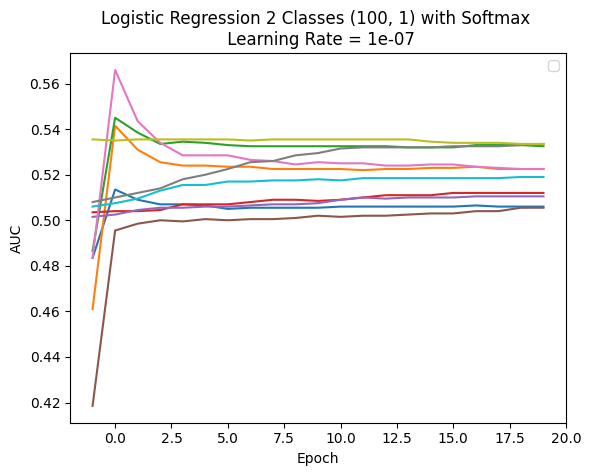

In [40]:
# SOFTMAX 2 CLASS  RATIO 

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_softmax(epoch, train_loader_ratio, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()
  